In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from utils import cleaner
import utils.plotter as plotter

## Training, Validation, and Test

## Orderbook

In [3]:
dates = ['09-Jun-2022','10-Jun-2022','11-Jun-2022','12-Jun-2022','13-Jun-2022','14-Jun-2022','16-Jun-2022','17-Jun-2022']
dates = ['15-Aug-2024','16-Aug-2024']
dates = ['15-Aug-2024', '16-Aug-2024','19-Aug-2024','20-Aug-2024','21-Aug-2024']

dates = ['09-Jun-2022']
dates =['23-Aug-2024','24-Aug-2024','25-Aug-2024','26-Aug-2024','27-Aug-2024','29-Aug-2024']


orderbook = []

for idx, date in enumerate(dates):
    orderbook.append(pd.read_csv(f'./data/input_data/{date}/orderbook_agg_trade_dollarvol.csv'))

In [4]:
for idx, date in enumerate(dates):
    orderbook[idx]['w_midprice'] = (orderbook[idx]['ask1']*orderbook[idx]['askqty1']+orderbook[idx]['bid1']*orderbook[idx]['bidqty1'])/(orderbook[idx]['askqty1']+orderbook[idx]['bidqty1'])

orderbook_all = pd.concat(orderbook)

In [ ]:
orderbook_all.to_csv('./data/input_data/all/orderbook.csv')

In [5]:
orderbook_all.set_index('datetime', inplace=True)
orderbook_all.sort_index(ascending=True, inplace=True)

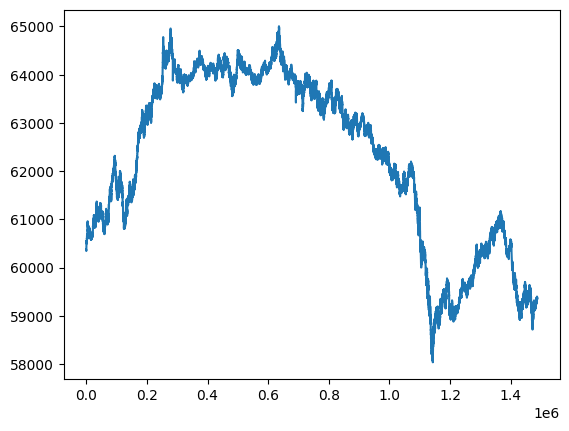

In [6]:
plt.plot(orderbook_all.w_midprice.to_list())

(1487467, 43)


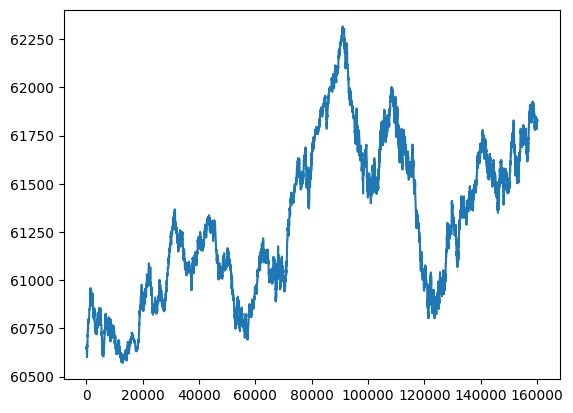

In [7]:
from IPython.display import clear_output
import time
li = orderbook_all.w_midprice.to_list()
print(orderbook_all.shape)
#for a in range(10000):
#    plt.plot(li[a:a+1000])
#    #wait for 1 sec
a =3000
plt.plot(li[a:a+160000])



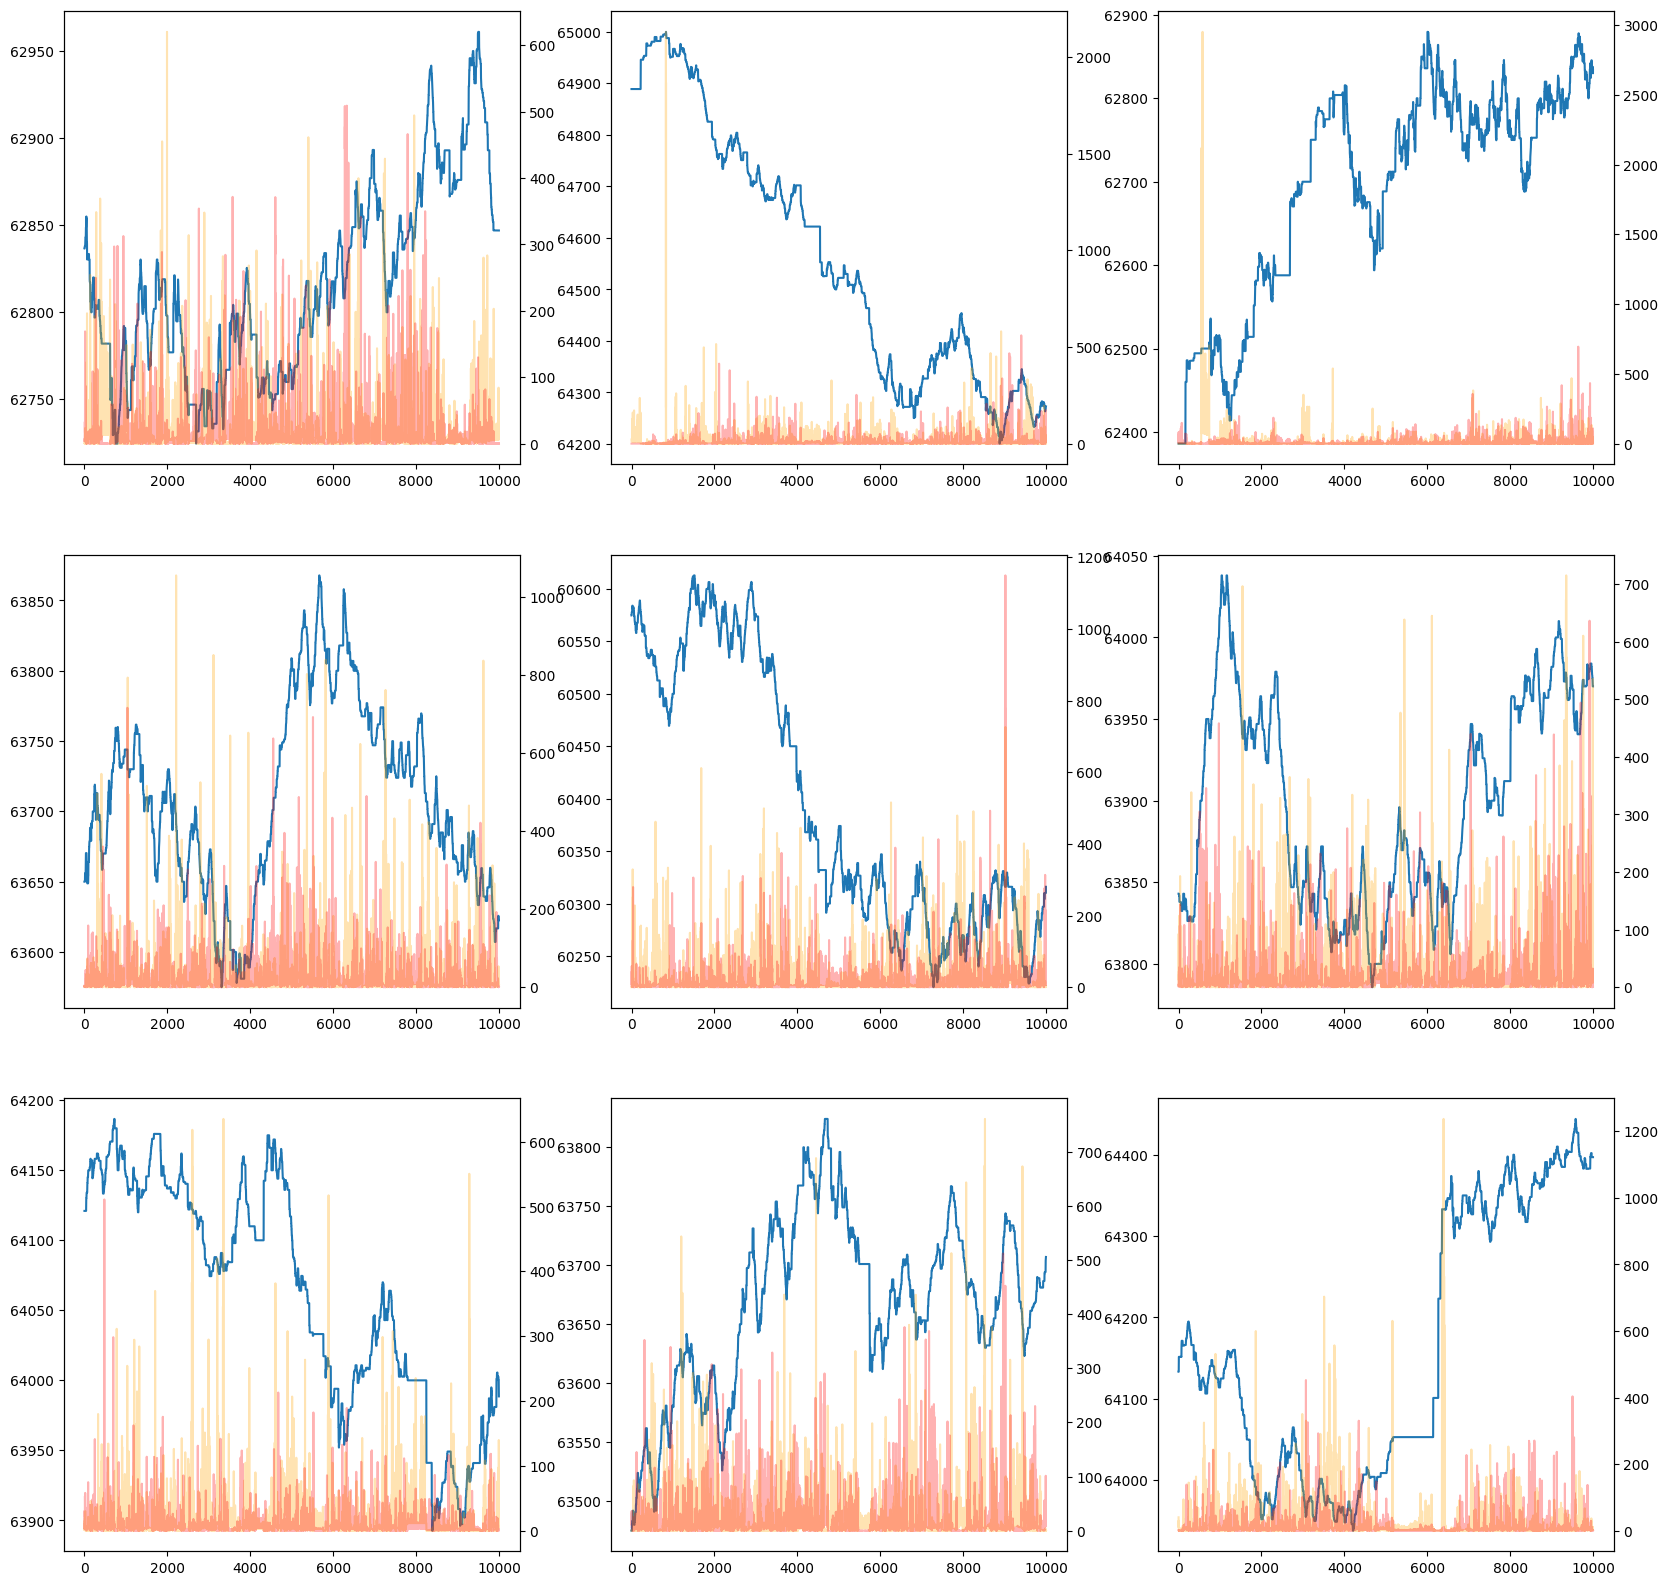

In [11]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

plot_idx = 0
for idx in range(3):
  for jdx in range(3):
    rand = np.random.randint(0, len(orderbook_all)-10000, size=1)
    # duration = (datetime.datetime.strptime(orderbook_all.datetime[rand[0]+1000],'%Y-%m-%d %H:%M:%S.%f') - datetime.datetime.strptime(orderbook_all.datetime[rand[0]],'%Y-%m-%d %H:%M:%S.%f')).seconds 
    #updates = orderbook_all.lastUpdateId[rand[0]+10000]-orderbook_all.lastUpdateId[rand[0]]
    ax2 = ax[idx][jdx].twinx()
    ax[idx][jdx].plot(orderbook_all.w_midprice.tolist()[rand[0]:rand[0]+10000])
    ax2.plot(orderbook_all.askqty1.to_list()[rand[0]:rand[0]+10000], color='orange', alpha=0.3)
    ax2.plot(orderbook_all.bidqty1.to_list()[rand[0]:rand[0]+10000], color='red',alpha=0.3)
    #ax[idx][jdx].set_title(f'Updates {updates}')
    plot_idx += 1

In [12]:
orderbook_all['update_diff'] = orderbook_all['lastUpdatedId'] - orderbook_all['lastUpdatedId'].shift(1)


KeyError: 'lastUpdatedId'

In [ ]:
orderbook_all.to_csv('./data/input_data/all/orderbook_test.csv')

In [ ]:
orderbook_all_active = orderbook_all[orderbook_all['update_diff'] > 9]

In [ ]:
orderbook_all_active.to_csv('./data/input_data/all/orderbook_active.csv')

In [ ]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

plot_idx = 0
for idx in range(3):
  for jdx in range(3):
    rand = np.random.randint(0, len(orderbook_all_active)-1000, size=1)
    updates = orderbook_all_active.lastUpdatedId[rand[0]+1000]-orderbook_all_active.lastUpdatedId[rand[0]]
    ax2 = ax[idx][jdx].twinx()
    ax[idx][jdx].plot(orderbook_all_active.w_midprice.tolist()[rand[0]:rand[0]+1000])
    ax2.plot(orderbook_all_active.askqty1.to_list()[rand[0]:rand[0]+1000], color='orange')
    ax2.plot(orderbook_all_active.bidqty1.to_list()[rand[0]:rand[0]+1000], color='red')
    ax[idx][jdx].set_title(f'Updates {updates}')
    plot_idx += 1

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 8))

ax[0].plot(orderbook_all.lastUpdatedId.to_list())
ax[1].plot(orderbook_all_active.lastUpdatedId.to_list())

In [ ]:
id2 = np.array(orderbook_all.lastUpdatedId.to_list()[1:])
id1 = np.array(orderbook_all.lastUpdatedId.to_list()[:-1])

In [ ]:
diff = id2-id1

print(f'mean: {np.mean(diff)}')
print(f'std: {np.std(diff)}')
print(f'min: {np.min(diff)}')

In [ ]:
orderbook_all = pd.read_csv('./data/input_data/all/orderbook.csv')

In [13]:
orderbook_all['returns'] = (orderbook_all['w_midprice']-orderbook_all['w_midprice'].shift(1))/orderbook_all['w_midprice'].shift(1)
orderbook_all['log_returns'] = (np.log(orderbook_all['w_midprice'])-np.log(orderbook_all['w_midprice'].shift(1)))

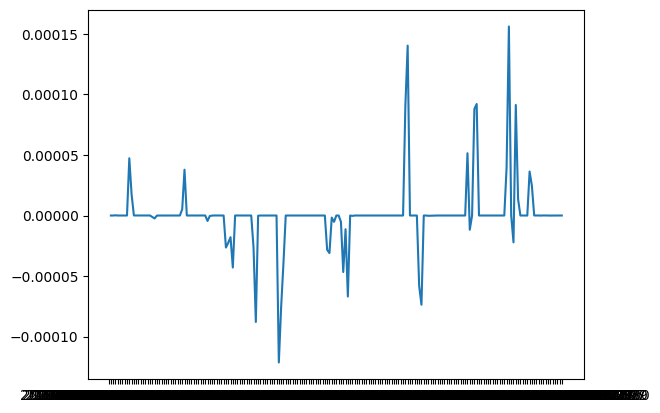

In [16]:
plt.plot(orderbook_all.log_returns[:200])

In [ ]:
plt.plot(orderbook_all.returns[:200_000])

In [17]:
idx=1700000
plt.plot((orderbook_all.returns[idx+100:idx+125]/np.subtract(*np.percentile(orderbook_all.returns[idx:idx+100], [75, 25], axis=0)))-np.mean(orderbook_all.returns[idx:idx+100]))

IndexError: index -1 is out of bounds for axis 0 with size 0

In [ ]:
idx=500
plt.plot(orderbook_all.returns[idx+100:idx+125]/np.std(orderbook_all.returns[idx:idx+100])-np.median(orderbook_all.returns[idx:idx+100]))

In [ ]:
orderbook = pd.read_csv('./data/input_data/all/orderbook.csv')

In [ ]:
orderbook['rate_lag30'] = np.log(orderbook['w_midprice']/orderbook['w_midprice'].shift(periods=-30))
orderbook['rate_lag15'] = np.log(orderbook['w_midprice']/orderbook['w_midprice'].shift(periods=-15))
orderbook['rate_lag1'] = np.log(orderbook['w_midprice']/orderbook['w_midprice'].shift(periods=-1))

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(orderbook.rate_lag1[0:2_02_000])
ax1.plot(orderbook.rate_lag15[0:2_02_000])
ax1.plot(orderbook.rate_lag30[0:2_02_000],color = 'blue')
ax2.plot(orderbook.w_midprice[0:2_02_000], color='orange')

In [ ]:
orderbook['returns_lag'] = np.log(orderbook['w_midprice'].shift(1)/orderbook['w_midprice'].shift(2))*10000
orderbook['mid_price_diff'] = orderbook['w_midprice']-orderbook['w_midprice'].shift(1)

In [ ]:
orderbook_2 = orderbook[orderbook['mid_price_diff'] != 0]
orderbook_2.drop(columns=['returns_lag','mid_price_diff'], inplace=True)

In [ ]:
orderbook_2

In [ ]:
orderbook_2.to_csv('./data/input_data/all/orderbook_test_lags.csv', index=False)

In [ ]:
orderbook_2['lag_return'] = np.log(orderbook_2['w_midprice'].shift(10)/orderbook_2['w_midprice'].shift(10+1))

In [ ]:
plt.plot(orderbook_2.w_midprice[1_000_000:1_100_000].to_list())

In [ ]:
plt.plot(orderbook_2.w_midprice.to_list())


In [ ]:
plt.plot(orderbook_2.w_midprice[2_000_000:2_100_000].to_list())